## notebook identifies dihydroxy compounds in ALL_GNPS library by SMILES

### Section 1: Identify all BA
 - (mono, di, tri, tetra) from substructure

### Section 2: Identify all dihydroxy BA
 - from dihydroxy substructure
 - remove tetra- and tri-hydroxy BA from dihydroxy search
 
### Section 3: Identify dihydroxy BA variations

 - di_3_7
 - di_3_6
 - di_3_12

### load data

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

In [3]:
import v_rdkit_functions
from v_rdkit_functions import mol_from_smiles_in_library
from v_rdkit_functions import substruct_search_from_smiles

In [4]:
# from v_get_ALL_GNPS_input_library.ipynb

input_library_full_df_loaded = pd.read_parquet('/home/jovyan/work/notebooks/outputs/ALL_GNPS_input_library.gzip')

In [5]:
input_library_full_df_loaded.columns

Index(['spectrum_id', 'source_file', 'task', 'scan', 'ms_level',
       'library_membership', 'spectrum_status', 'peaks_json', 'splash',
       'submit_user', 'Compound_Name', 'Ion_Source', 'Compound_Source',
       'Instrument', 'PI', 'Data_Collector', 'Adduct', 'Scan', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'SpectrumID', 'Ion_Mode', 'create_time',
       'task_id', 'user_id', 'InChIKey_smiles', 'InChIKey_inchi',
       'Formula_smiles', 'Formula_inchi', 'url', 'annotation_history'],
      dtype='object')

In [6]:
input_library_no_suspect_list = input_library_full_df_loaded[~input_library_full_df_loaded['library_membership'].str.contains('suspect',case=False,na=False)]

In [7]:
adduct_labels = ['M+H','[M+H]','[M+H]+']

In [8]:
input_library = input_library_no_suspect_list[input_library_no_suspect_list["Adduct"].isin(adduct_labels)]

In [9]:
len(input_library)

245648

In [10]:
smiles_w_rdkit_obj_dict = mol_from_smiles_in_library(input_library)

[16:14:45] SMILES Parse Error: syntax error while parsing: N/A
[16:14:45] SMILES Parse Error: Failed parsing SMILES 'N/A' for input: 'N/A'
[16:14:45] SMILES Parse Error: syntax error while parsing: 
[16:14:45] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[16:14:46] SMILES Parse Error: syntax error while parsing: N/A
[16:14:46] SMILES Parse Error: Failed parsing SMILES ' N/A' for input: ' N/A'
[16:14:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[16:14:46] SMILES Parse Error: Failed parsing SMILES ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[16:14:46] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 16
[16:14:46] Explicit valence for atom # 22 O, 3, is greater than permitte

In [11]:
len(smiles_w_rdkit_obj_dict)

29678

### Section 1: Substructure matching for all BA

In [12]:
# substructure to include all BA variations

mono_di_tri_tetra = 'O=CCC[C@@H](C)C1CC[C@@]2([H])C3CC[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC[C@@]21C'

In [13]:
mono_di_tri_tetra_mol = Chem.MolFromSmiles(mono_di_tri_tetra)

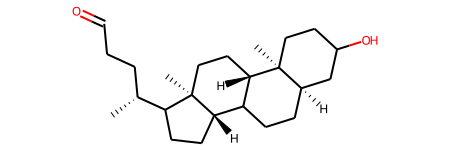

In [14]:
mono_di_tri_tetra_mol

In [15]:
library_df_w_Mono_di_tri_tetra_matched = substruct_search_from_smiles(input_library, smiles_w_rdkit_obj_dict, mono_di_tri_tetra)

In [16]:
len(library_df_w_Mono_di_tri_tetra_matched)

1406

### Section 2: Substructure matching for dihydroxy BA

#### identify tetra- and tri-hydroxy BA (to eventually remove to isolate di-)

In [23]:
# substructure to identify tetra- and tri-hydroxy BA

tri_tetra = ['O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([H])([C@@]21C)[H])[H])C)O)[H])O)O)[H])C',
             'O=CCC[C@@H](C)C1CC[C@@]2([H])C3C(O)C([H])([H])[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC(O)[C@@]21C',
             'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([C@@]21C)O)[H])C)O)[H])O)([H])[H])[H])C']

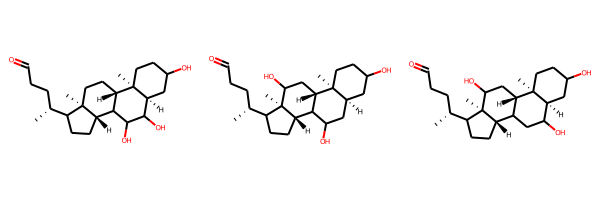

In [24]:
tri_tetra_mol = [Chem.MolFromSmiles(x) for x in tri_tetra]
Draw.MolsToGridImage(tri_tetra_mol)

In [26]:
tri_tetra_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() for item in tri_tetra_mol if v.HasSubstructMatch(item)]

In [28]:
library_df_w_tri_tetra_matched = input_library[input_library['Smiles'].isin(tri_tetra_mol_matched_list)]

In [29]:
len(library_df_w_tri_tetra_matched)

621

#### identify molecules that contain dihydroxy-BA substructure

In [18]:
# substructure to include all three dihydroxy BA variations
# also includes tetra- and tri-hydroxy BA

di_tri_tetra = ['O=CCC[C@@H](C)C1CC[C@@]2([H])C3C(O)C([H])([H])[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC([H])([H])[C@@]21C',
                'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([H])([C@@]21C)[H])[H])C)O)[H])O)([H])[H])[H])C',
                'O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([C@@]21C)O)[H])C)O)[H])([H])[H])([H])[H])[H])C']

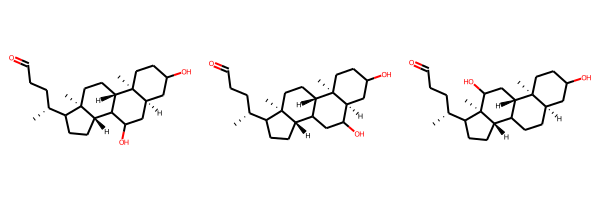

In [19]:
di_tri_tetra_mol = [Chem.MolFromSmiles(x) for x in di_tri_tetra]
Draw.MolsToGridImage(di_tri_tetra_mol)

#### isolate dihydroxy BA from above substructures by removing tetra- and tri-hydroxy BA

In [20]:
# identify SMILES in library input that contain substructure above

di_tri_tetra_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() for item in di_tri_tetra_mol if v.HasSubstructMatch(item)]

In [21]:
library_df_w_di_tri_tetra_matched = input_library[input_library['Smiles'].isin(di_tri_tetra_mol_matched_list)]

In [22]:
len(library_df_w_di_tri_tetra_matched)

1325

In [31]:
tri_tetra_ID_exclusion_list = library_df_w_tri_tetra_matched.spectrum_id.to_list()

In [34]:
len(tri_tetra_ID_exclusion_list)

621

In [32]:
library_df_w_dihydroxy_BA_only_matched = library_df_w_di_tri_tetra_matched[~library_df_w_di_tri_tetra_matched.spectrum_id.isin(tri_tetra_ID_exclusion_list)]

In [33]:
library_df_w_dihydroxy_BA_only_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
4186,CCMSLIB00004722204,f.aaksenov/Nobel_study/Twins/Samples/TWDP_001_...,902c7059ff92477498fa4190e1e8c628,1714,2,GNPS-LIBRARY,1,"[[79.052254,35.000000],[80.061600,30.000000],[...",null-null-null-null,aaksenov,...,Positive,2019-01-11 14:53:10.0,902c7059ff92477498fa4190e1e8c628,null,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF-UHFFFAOYSA-N,C33H49NO5,C33H49NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5039,CCMSLIB00005436491,f.MSV000081477/ccms_peak/mzXML/Plate6/C220_GA7...,578f8becb8314aca9a3bbce6621eaed1,1374,2,GNPS-LIBRARY,1,"[[105.074013,83.000000],[107.084953,199.000000...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:02:45.0,578f8becb8314aca9a3bbce6621eaed1,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5040,CCMSLIB00005436492,f.MSV000082480/ccms_peak/mzXML/A23_120_20.mzML;,a5a766d2747549f5a154ebc66d15ecce,1873,2,GNPS-LIBRARY,1,"[[50.455456,678.341980],[51.303623,899.186401]...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:05:12.0,a5a766d2747549f5a154ebc66d15ecce,null,CEMZGPKUKMFNNF-UHFFFAOYSA-N,,C33H49NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5041,CCMSLIB00005436493,f.lfnothias/TEMP/CCMSLIB_adding_clustered.mgf;,6e683fa377d749bd919b6fce3c27b881,1,2,GNPS-LIBRARY,1,"[[81.070137,109557.789062],[93.070023,43555.72...",null-null-null-null,lfnothias,...,Positive,2019-12-10 17:02:03.0,6adb63dbdf0242e884f871b3142f68eb,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5572,CCMSLIB00005467947,f.MSV000084630/peak/mzML/A45_181_11.mzML;,9e59c1b36ca340d5a669ddb90a38edfa,722,2,GNPS-LIBRARY,1,"[[51.654568,1701.583862],[55.055103,15476.3974...",null-null-null-null,lfnothias,...,Positive,2019-12-10 15:52:11.0,9e59c1b36ca340d5a669ddb90a38edfa,null,LJAIXMQYBNEUSB-UHFFFAOYSA-N,,C30H52N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576352,CCMSLIB00006118612,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3521,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[153.225693,134730.703125],[186.113907,154933...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576353,CCMSLIB00006118614,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3522,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[128.255997,162435.296875],[142.742096,150349...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576354,CCMSLIB00006118616,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3523,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[127.004204,157320.000000],[130.210907,168844...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576355,CCMSLIB00006118618,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3524,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[123.340302,156720.593750],[173.005096,263213...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https:

### Section 3: Substructure matching for dihydroxy BA variations

#### dihydroxy_3_7

In [35]:
# substructure for di_3_7

di_3_7_mol = Chem.MolFromSmiles('O=CCC[C@@H](C)C1CC[C@@]2([H])C3C(O)C([H])([H])[C@]4([H])CC(O)CC[C@]4(C)[C@@]3([H])CC([H])([H])[C@@]21C')

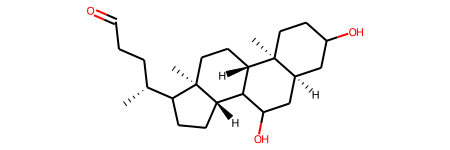

In [36]:
di_3_7_mol

In [37]:
di_3_7_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() if v.HasSubstructMatch(di_3_7_mol)]

In [38]:
library_df_w_di_3_7_matched = library_df_w_dihydroxy_BA_only_matched[library_df_w_dihydroxy_BA_only_matched['Smiles'].isin(di_3_7_mol_matched_list)]

In [39]:
library_df_w_di_3_7_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
4186,CCMSLIB00004722204,f.aaksenov/Nobel_study/Twins/Samples/TWDP_001_...,902c7059ff92477498fa4190e1e8c628,1714,2,GNPS-LIBRARY,1,"[[79.052254,35.000000],[80.061600,30.000000],[...",null-null-null-null,aaksenov,...,Positive,2019-01-11 14:53:10.0,902c7059ff92477498fa4190e1e8c628,null,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF-UHFFFAOYSA-N,C33H49NO5,C33H49NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5039,CCMSLIB00005436491,f.MSV000081477/ccms_peak/mzXML/Plate6/C220_GA7...,578f8becb8314aca9a3bbce6621eaed1,1374,2,GNPS-LIBRARY,1,"[[105.074013,83.000000],[107.084953,199.000000...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:02:45.0,578f8becb8314aca9a3bbce6621eaed1,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5040,CCMSLIB00005436492,f.MSV000082480/ccms_peak/mzXML/A23_120_20.mzML;,a5a766d2747549f5a154ebc66d15ecce,1873,2,GNPS-LIBRARY,1,"[[50.455456,678.341980],[51.303623,899.186401]...",null-null-null-null,lfnothias,...,Positive,2019-08-12 16:05:12.0,a5a766d2747549f5a154ebc66d15ecce,null,CEMZGPKUKMFNNF-UHFFFAOYSA-N,,C33H49NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5041,CCMSLIB00005436493,f.lfnothias/TEMP/CCMSLIB_adding_clustered.mgf;,6e683fa377d749bd919b6fce3c27b881,1,2,GNPS-LIBRARY,1,"[[81.070137,109557.789062],[93.070023,43555.72...",null-null-null-null,lfnothias,...,Positive,2019-12-10 17:02:03.0,6adb63dbdf0242e884f871b3142f68eb,null,CYHFCBVFHBCQHF-UHFFFAOYSA-N,,C35H50N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
5572,CCMSLIB00005467947,f.MSV000084630/peak/mzML/A45_181_11.mzML;,9e59c1b36ca340d5a669ddb90a38edfa,722,2,GNPS-LIBRARY,1,"[[51.654568,1701.583862],[55.055103,15476.3974...",null-null-null-null,lfnothias,...,Positive,2019-12-10 15:52:11.0,9e59c1b36ca340d5a669ddb90a38edfa,null,LJAIXMQYBNEUSB-UHFFFAOYSA-N,,C30H52N2O5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576008,CCMSLIB00006118021,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3177,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[55.053902,78926.890625],[56.753601,8343.8701...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,BHTRKEVKTKCXOH-LBSADWJPSA-N,,C26H45NO6S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576009,CCMSLIB00006118023,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3178,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[55.054001,74045.343750],[57.069599,11724.040...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,BHTRKEVKTKCXOH-LBSADWJPSA-N,,C26H45NO6S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576010,CCMSLIB00006118024,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3179,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[160.497498,6855.089844],[160.917099,7469.240...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,BHTRKEVKTKCXOH-LBSADWJPSA-N,,C26H45NO6S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576011,CCMSLIB00006118026,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3180,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[137.383804,6991.359863],[145.442596,6581.029...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,BHTRKEVKTKCXOH-LBSADWJPSA-N,,C26H45NO6S,,ht

In [47]:
# library_df_w_di_3_7_matched[library_df_w_di_3_7_matched['library_membership'].str.contains('BILELIB19')]

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
38734,CCMSLIB00005435510,Standards_p_1ugmL_glycochenodeoxycholic.mzXML,c816bf203d2d4b7a96666c61155a1023,1491,2,BILELIB19,1,"[[49.502735,0.000000],[49.503067,0.000000],[49...",null-null-null-null,mpanitchpakdi,...,Positive,2019-04-09 10:13:28.0,c816bf203d2d4b7a96666c61155a1023,null,GHCZAUBVMUEKKP-GYPHWSFCSA-N,GHCZAUBVMUEKKP-AJEXLSFKSA-N,C26H43NO5,C26H43NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '640-79-9', '..."
38760,CCMSLIB00005435536,Standards_p_1ugmL_glycourodeoxycholic.mzXML,c816bf203d2d4b7a96666c61155a1023,1239,2,BILELIB19,1,"[[49.502644,0.000000],[49.502972,0.000000],[49...",null-null-null-null,mpanitchpakdi,...,Positive,2019-04-09 10:13:28.0,c816bf203d2d4b7a96666c61155a1023,null,GHCZAUBVMUEKKP-XROMFQGDSA-N,GHCZAUBVMUEKKP-WTFVBUONSA-N,C26H43NO5,C26H43NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '64480-66-6',..."
38778,CCMSLIB00005435554,Standards_p_1ugmL_taurochenodeoxycholic.mzXML,c816bf203d2d4b7a96666c61155a1023,1255,2,BILELIB19,1,"[[49.502789,0.000000],[49.503120,0.000000],[49...",null-null-null-null,mpanitchpakdi,...,Positive,2019-04-09 10:13:28.0,c816bf203d2d4b7a96666c61155a1023,null,BHTRKEVKTKCXOH-BJLOMENOSA-N,BHTRKEVKTKCXOH-GGFGVLMTSA-N,C26H45NO6S,C26H45NO6S,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '516-35-8', '..."
38817,CCMSLIB00005435593,Standards_p_1ugmL_tauroursodeoxycholic.mzXML,c816bf203d2d4b7a96666c61155a1023,1051,2,BILELIB19,1,"[[49.502712,0.000000],[49.503040,0.000000],[49...",null-null-null-null,mpanitchpakdi,...,Positive,2019-04-09 10:13:28.0,c816bf203d2d4b7a96666c61155a1023,null,BHTRKEVKTKCXOH-LBSADWJPSA-N,BHTRKEVKTKCXOH-LBSADWJPSA-N,C26H45NO6S,C26H45NO6S,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '35807-85-3',..."
38845,CCMSLIB00005464644,emgentry/RBAs_POS_mzXML_including_add32/BA01_B...,f58979027c8d4fa5935a092ba5f3e3d3,1155,2,BILELIB19,1,"[[94.884171,53.000000],[95.044037,46.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2019-11-14 14:45:43.0,f58979027c8d4fa5935a092ba5f3e3d3,null,RIGHMQLKMHLMQD-DYUDRYMLSA-N,None,C27H45NO5S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43175,CCMSLIB00006584987,emgentry/BA multiplex reactions/ECG_1_19E_BC3_...,19888475b5024bf0b65fcf8ce098ab91,1584,2,BILELIB19,1,"[[76.189278,27.000000],[76.425537,30.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2021-06-16 11:29:23.0,19888475b5024bf0b65fcf8ce098ab91,null,MIGXYHMLYVAUQT-HYYKMSORSA-N,MIGXYHMLYVAUQT-DUGKMNEJSA-N,C27H45NO6,C27H45NO6,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
43180,CCMSLIB00006584994,emgentry/BA multiplex reactions/ECG_1_19E_BC3_...,19888475b5024bf0b65fcf8ce098ab91,1656,2,BILELIB19,1,"[[75.006882,21.000000],[75.029045,42.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2021-06-16 11:29:23.0,19888475b5024bf0b65fcf8ce098ab91,null,FDLBWFQZCBIUPV-HNPURGDHSA-N,FDLBWFQZCBIUPV-RZKHXNHHSA-N,C28H47NO6,C28H47NO6,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
43186,CCMSLIB00006585000,emgentry/BA multiplex reactions/ECG_1_19E_BC3_...,19888475b5024bf0b65fcf8ce098ab91,2070,2,BILELIB19,1,"[[75.296448,41.000000],[76.803711,26.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2021-06-16 11:29:23.0,19888475b5024bf0b65fcf8ce098ab91,null,CYHFCBVFHBCQHF-ROCQNFIOSA-N,CYHFCBVFHBCQHF-IXYFDAGZSA-N,C35H50N2O5,C35H50N2O5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
43192,CCMSL

#### dihydroxy_3_6

In [48]:
# substructure for di_3_6

di_3_6_mol = Chem.MolFromSmiles('O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([H])([C@@]21C)[H])[H])C)O)[H])O)([H])[H])[H])C')

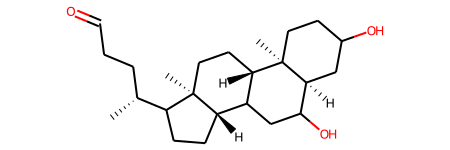

In [49]:
di_3_6_mol

In [50]:
di_3_6_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() if v.HasSubstructMatch(di_3_6_mol)]

In [51]:
library_df_w_di_3_6_matched = library_df_w_dihydroxy_BA_only_matched[library_df_w_dihydroxy_BA_only_matched['Smiles'].isin(di_3_6_mol_matched_list)]

In [52]:
library_df_w_di_3_6_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
38805,CCMSLIB00005435581,Standards_p_1ugmL_taurohyodeoxycholic.mzXML,c816bf203d2d4b7a96666c61155a1023,1044,2,BILELIB19,1,"[[49.502674,0.000000],[49.503006,0.000000],[49...",null-null-null-null,mpanitchpakdi,...,Positive,2019-04-09 10:13:28.0,c816bf203d2d4b7a96666c61155a1023,null,HMXPOCDLAFAFNT-BHYUGXBJSA-N,HMXPOCDLAFAFNT-QMKMXMJNSA-N,C26H45NO6S,C26H45NO6S,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '2958-04-05',..."
38891,CCMSLIB00005464690,emgentry/RBAs_POS_mzXML_including_add32/BA101_...,f58979027c8d4fa5935a092ba5f3e3d3,823,2,BILELIB19,1,"[[95.048393,395.000000],[95.086067,9696.000000...",null-null-null-null,mpanitchpakdi,...,Positive,2019-11-14 14:45:43.0,f58979027c8d4fa5935a092ba5f3e3d3,null,HMXPOCDLAFAFNT-CZNXQHJVSA-N,None,C26H45NO6S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
39684,CCMSLIB00005465483,emgentry/RBAs_POS_mzXML_including_add32/BA320_...,f58979027c8d4fa5935a092ba5f3e3d3,1690,2,BILELIB19,1,"[[95.088341,2568.000000],[96.090706,74.000000]...",null-null-null-null,mpanitchpakdi,...,Positive,2019-11-14 14:45:43.0,f58979027c8d4fa5935a092ba5f3e3d3,null,CIICTINKDWKIAB-VRNQQRGISA-N,None,C30H48O6,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
39738,CCMSLIB00005465537,emgentry/RBAs_POS_mzXML_including_add32/BA339_...,f58979027c8d4fa5935a092ba5f3e3d3,804,2,BILELIB19,1,"[[95.051926,111.000000],[95.085709,7961.000000...",null-null-null-null,mpanitchpakdi,...,Positive,2019-11-14 14:45:43.0,f58979027c8d4fa5935a092ba5f3e3d3,null,HMXPOCDLAFAFNT-BHYUGXBJSA-N,None,C26H45NO6S,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
40365,CCMSLIB00006582134,emgentry/BA multiplex reactions/mzMLs_2/18D.mzML,b4a065cda6794ae7a5f7a211141875ad,2254,2,BILELIB19,1,"[[76.400627,2566.813965],[79.054543,8064.58837...",null-null-null-null,mpanitchpakdi,...,Positive,2021-06-16 11:27:57.0,b4a065cda6794ae7a5f7a211141875ad,null,WOBPBTDFDODUKX-RONCKHPDSA-N,WOBPBTDFDODUKX-HVEJSODHSA-N,C27H45NO5,C27H45NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43001,CCMSLIB00006584810,emgentry/BA multiplex reactions/ECG_1_19D_BC2_...,19888475b5024bf0b65fcf8ce098ab91,1960,2,BILELIB19,1,"[[75.039505,40.000000],[75.095451,28.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2021-06-16 11:29:23.0,19888475b5024bf0b65fcf8ce098ab91,null,STPSGKIPCULXDW-RZUWVZROSA-N,STPSGKIPCULXDW-KNYMBCEDSA-N,C29H49NO5,C29H49NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
92270,CCMSLIB00006674562,Marynka_MassSpecGirl/STD_POS/HyodeoxycholicAci...,68277466d22743e6b617c8723e12c409,3191,2,GNPS-NUTRI-METAB-FEM-POS,1,"[[98.379288,4316.258301],[102.346672,4245.5693...",null-null-null-null,mpanitchpakdi,...,Positive,2021-07-01 10:34:44.0,68277466d22743e6b617c8723e12c409,null,DGABKXLVXPYZII-UHFFFAOYSA-N,DGABKXLVXPYZII-SIBKNCMHSA-N,C24H40O4,C24H40O4,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '83-49-8', 'C..."
464063,CCMSLIB00005738164,massbank-gnps.mgf,85b13fcf2f1d4f8cbdb7a85f519cc8b2,12613,2,MASSBANK,1,"[[48.044201,42.000000],[48.174702,44.000000],[...",null-null-null-null,mwang87,...,Positive,2020-11-16 20:03:48.0,85b13fcf2f1d4f8cbdb7a85f519cc8b2,null,SPOIYSFQOFYOFZ-UHFFFAOYSA-N,SPOIYSFQOFYOFZ-UHFFFAOYSA-N,C26H43NO5,C26H43NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '13042-33-6',..."
464433,CCMSLIB00005738534,massbank-gnps.mgf,85b13fcf2f1d4f8cbdb7a85f519cc8b2,12983,2,MASSBANK

In [54]:
# library_df_w_di_3_6_matched[library_df_w_di_3_6_matched['library_membership'].str.contains('BILELIB19')]

#### dihydroxy_3_12

In [55]:
# substructure for di_3_12

di_3_12_mol = Chem.MolFromSmiles('O=CCC[C@H](C1CC[C@]2(C3C(C([C@@]4(CC(CC[C@@]4([C@]3(CC([C@@]21C)O)[H])C)O)[H])([H])[H])([H])[H])[H])C')

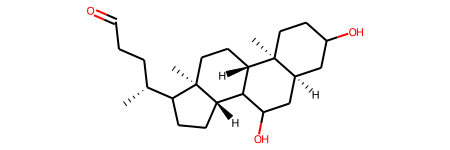

In [36]:
di_3_12_mol

In [57]:
di_3_12_mol_matched_list = [k for k,v in smiles_w_rdkit_obj_dict.items() if v.HasSubstructMatch(di_3_12_mol)]

In [58]:
library_df_w_di_3_12_matched = library_df_w_dihydroxy_BA_only_matched[library_df_w_dihydroxy_BA_only_matched['Smiles'].isin(di_3_12_mol_matched_list)]

In [59]:
library_df_w_di_3_12_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
5734,CCMSLIB00005716807,f.MSV000084630/peak/BA_Standards_mzML/Phe-DCA_...,4623de02212541b08dde7bc25bd23434,844,2,GNPS-LIBRARY,1,"[[55.054985,2316.610107],[57.070507,1189.92688...",null-null-null-null,lfnothias,...,Positive,2020-02-17 14:45:31.0,a892a8b0e1dc4dca99c27a811ae72141,null,RFRCQJKUNLZBAM-SYIRRQCNSA-N,,C33H49NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
33443,CCMSLIB00003136511,MSV000080469/ccms_peak/AMG_mzXML/10317.0000326...,65f6bd9e532b4604a3da3c936ee8be6c,2908,2,GNPS-NIST14-MATCHES,1,"[[76.039856,145405.984375],[79.055176,4992.337...",null-null-null-null,mwang87,...,Positive,2021-03-20 21:04:33.0,dc0840d8170b4ca4b829747b16745a38,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,WVULKSPCQVQLCU-BUXLTGKBSA-N,C26H43NO5,C26H43NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '360656', 'Ch..."
34814,CCMSLIB00003137882,MSV000079819/ccms_peak/160610_homogenized_cont...,65f6bd9e532b4604a3da3c936ee8be6c,3319,2,GNPS-NIST14-MATCHES,1,"[[74.253380,0.000000],[74.253990,0.000000],[74...",null-null-null-null,mwang87,...,Positive,2021-03-20 22:50:23.0,f1a070a172cc40d68c70d78ee45d81e8,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,WVULKSPCQVQLCU-BUXLTGKBSA-N,C26H43NO5,C26H43NO5,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '360656', 'Ch..."
38340,CCMSLIB00005720571,IROATECH_MSMLS_SCIEX_5600_TripleTOF.mgf,b7fdd6cc19424f9f80605bc124523f29,249,2,PSU-MSMLS,1,"[[57.069302,31.000000],[57.072498,41.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2020-04-10 13:26:10.0,b7fdd6cc19424f9f80605bc124523f29,null,KXGVEGMKQFWNSR-LLQZFEROSA-N,None,C24H40O4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]+', 'CAS_Number': ' 83-44-3'..."
38348,CCMSLIB00005720579,IROATECH_MSMLS_SCIEX_5600_TripleTOF.mgf,b7fdd6cc19424f9f80605bc124523f29,257,2,PSU-MSMLS,1,"[[57.072498,31.000000],[57.077831,20.000000],[...",null-null-null-null,mpanitchpakdi,...,Positive,2020-04-10 13:26:10.0,b7fdd6cc19424f9f80605bc124523f29,null,FHHPUSMSKHSNKW-SMOYURAASA-M,None,C24H39NaO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]+', 'CAS_Number': ' 302-95-4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576352,CCMSLIB00006118612,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3521,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[153.225693,134730.703125],[186.113907,154933...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576353,CCMSLIB00006118614,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3522,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[128.255997,162435.296875],[142.742096,150349...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576354,CCMSLIB00006118616,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3523,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[127.004204,157320.000000],[130.210907,168844...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,WVULKSPCQVQLCU-BUXLTGKBSA-N,,C26H43NO5,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
576355,CCMSLIB00006118618,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,3524,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[123.340302,156720.593750],[173.005096,263213...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413

In [61]:
# library_df_w_di_3_12_matched[library_df_w_di_3_12_matched['library_membership'].str.contains('BILELIB19')]

### Save files

In [62]:
library_df_w_dihydroxy_BA_only_matched.reset_index().to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_BA_only_m+h_matches.csv', sep=',', index=False)

In [63]:
library_df_w_di_3_7_matched.reset_index().to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_3_7_only_m+h_matches.csv', sep=',', index=False)
library_df_w_di_3_6_matched.to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_3_6_only_m+h_matches.csv', sep=',', index=False)
library_df_w_di_3_12_matched.to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_3_12_only_m+h_matches.csv', sep=',', index=False)